<a href="https://colab.research.google.com/github/nanigbogu/nanigbogu/blob/main/lab_7_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

from sklearn.metrics import ConfusionMatrixDisplay

from google.colab import drive

np.random.seed(42)

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!ls drive/MyDrive/datasets/archive

fashion-mnist_test.csv	 t10k-images-idx3-ubyte  train-images-idx3-ubyte
fashion-mnist_train.csv  t10k-labels-idx1-ubyte  train-labels-idx1-ubyte


In [59]:
train_path =  'drive/MyDrive/datasets/archive/train-images-idx3-ubyte/'
test_path = 'drive/MyDrive/datasets/archive/t10k-images-idx3-ubyte/'

In [61]:
plt.imshow(plt.imread(train_path + 'pixel781.jpg'));

FileNotFoundError: ignored

In [4]:
train = pd.read_csv('drive/MyDrive/datasets/archive/fashion-mnist_train.csv')
test = pd.read_csv('drive/MyDrive/datasets/archive/fashion-mnist_test.csv')

In [5]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [62]:
train['label'].unique()

array([2, 9, 6, 0, 3, 4, 5, 8, 7, 1])

0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot

Note: Each 28 pixels in height and 28 pixels in width

In [8]:
X = train.drop(columns='label')
y = train['label']

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X,y,random_state=42, stratify=y)

In [12]:
train_enc = tf.keras.utils.to_categorical(y_train)
val_enc = tf.keras.utils.to_categorical(y_val)

# MODEL 1 - Simple Feed Forward

In [19]:
X_train = X_train/255
X_val = X_val/255

In [23]:
model = Sequential()
model.add(Dense(units=80,input_dim=X_train.shape[1],activation='relu'))
model.add(Dense(70, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['acc']
)

early_stop = EarlyStopping(monitor = 'val_loss',
                          min_delta = 0,
                          patience = 5,
                          verbose = 1)

hist = model.fit(
    X_train,
    train_enc,
    validation_data= (X_val, val_enc),
    epochs=40,
    callbacks = early_stop
)

Epoch 1/40
1407/1407 [==============================] - 9s 4ms/step - loss: 1.2167 - acc: 0.4983 - val_loss: 111.4231 - val_acc: 0.5083
Epoch 2/40
1407/1407 [==============================] - 9s 6ms/step - loss: 0.8681 - acc: 0.6549 - val_loss: 224.7015 - val_acc: 0.4816
Epoch 3/40
1407/1407 [==============================] - 8s 6ms/step - loss: 0.7504 - acc: 0.6984 - val_loss: 307.9855 - val_acc: 0.4098
Epoch 4/40
1407/1407 [==============================] - 5s 4ms/step - loss: 0.6540 - acc: 0.7351 - val_loss: 212.9097 - val_acc: 0.4660
Epoch 5/40
1407/1407 [==============================] - 5s 4ms/step - loss: 0.5883 - acc: 0.7717 - val_loss: 230.4727 - val_acc: 0.5166
Epoch 6/40
1407/1407 [==============================] - 5s 4ms/step - loss: 0.5270 - acc: 0.8112 - val_loss: 203.2430 - val_acc: 0.5299
Epoch 6: early stopping


In [49]:
model.evaluate(X_val, val_enc)

469/469 [==============================] - 1s 3ms/step - loss: 203.2430 - acc: 0.5299


[203.2429962158203, 0.5299333333969116]

In [53]:
pred = np.argmax(model.predict(X_val), axis=1)
pred.mean()

5.137733333333333

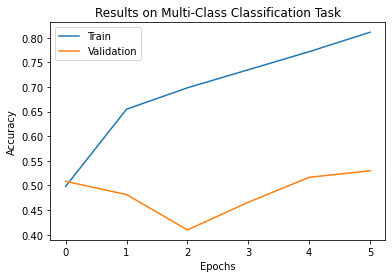

In [29]:
plt.plot(hist.history['acc'], label='Train')
plt.plot(hist.history['val_acc'], label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.title('Results on Multi-Class Classification Task');

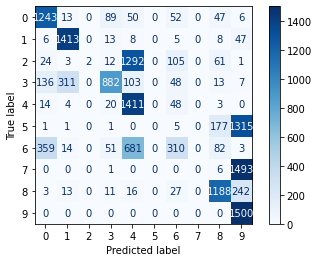

In [55]:
ConfusionMatrixDisplay.from_predictions(y_val,pred,cmap='Blues');

# MODEL 2 - CNN

In [31]:
X_train = np.array(X_train).reshape(X_train.shape[0],28,28)
X_test = np.array(X_val).reshape(X_val.shape[0],28,28)

In [38]:
model2 = Sequential()
model2.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Conv2D(64,(3,3),activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Flatten())
model2.add(Dense(64,activation='relu'))
model2.add(Dense(32,activation='softmax'))

model2.compile(
    optimizer = Adam(learning_rate=0.0001),
    loss = 'sparse_categorical_crossentropy',
    metrics = ['acc']
)

early_stop = EarlyStopping(monitor='val_loss',
                           min_delta=0,
                           patience=5,
                           verbose=1,
                          )

hist2 = model2.fit(
    X_train,
    y_train,
    batch_size=32,
    validation_data=(X_test,y_val),
    validation_batch_size=32,
    epochs=10,
    callbacks = early_stop)

Epoch 1/10
1407/1407 [==============================] - 8s 6ms/step - loss: 2.3926 - acc: 0.1039 - val_loss: 3.9258 - val_acc: 0.2160
Epoch 2/10
1407/1407 [==============================] - 7s 5ms/step - loss: 2.1177 - acc: 0.2740 - val_loss: 62.9947 - val_acc: 0.4472
Epoch 3/10
1407/1407 [==============================] - 6s 4ms/step - loss: 1.0105 - acc: 0.6567 - val_loss: 156.0211 - val_acc: 0.5771
Epoch 4/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.8035 - acc: 0.7062 - val_loss: 156.2746 - val_acc: 0.6115
Epoch 5/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.7533 - acc: 0.7234 - val_loss: 157.8714 - val_acc: 0.6075
Epoch 6/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.7207 - acc: 0.7341 - val_loss: 139.8990 - val_acc: 0.6198
Epoch 6: early stopping


In [50]:
model2.evaluate(X_test, y_val)

469/469 [==============================] - 2s 4ms/step - loss: 139.8990 - acc: 0.6198


[139.89903259277344, 0.6197999715805054]

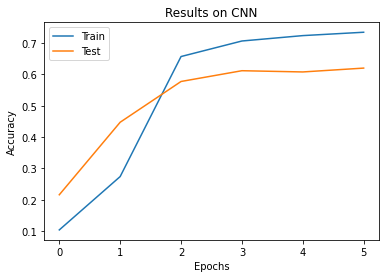

In [39]:
plt.plot(hist2.history['acc'], label='Train')
plt.plot(hist2.history['val_acc'], label='Test')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.title('Results on CNN');

In [58]:
pred2 = np.argmax(model2.predict(X_test), axis=1)
pred2.mean()

4.749333333333333

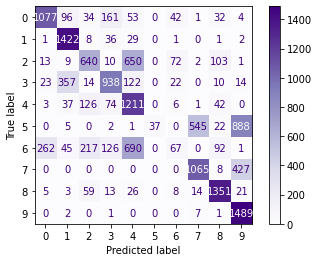

In [46]:
ConfusionMatrixDisplay.from_predictions(y_val,pred2,cmap='Purples');